Wytrenowane parametry theta:
[[-13.84819568]
 [  5.34143242]]
2.592599622492157
[0.5]


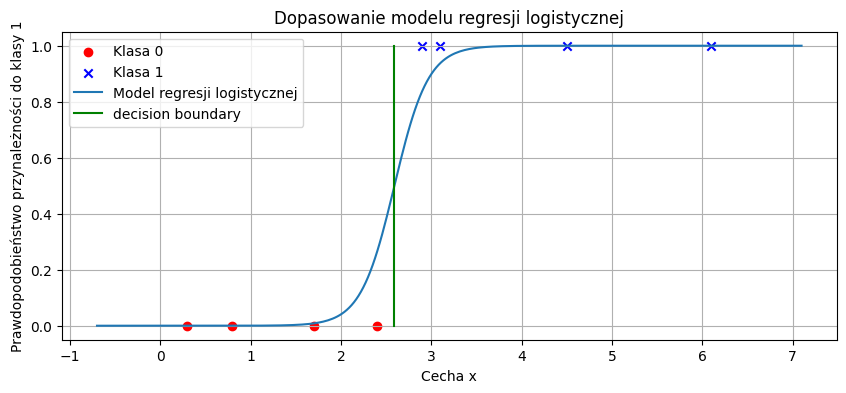

In [ ]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]

X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

def gradient_descent(X, y, theta, alpha, eps, max_iter=10000):
    m = y.shape[1]
    previous_cost = calculate_cost(X, y, theta)
    for i in range(max_iter):
        h_y_diff = h_fun(X, theta) - y
        gradient = (h_y_diff @ X.T) / m
        theta -= alpha * gradient.T
        current_cost = calculate_cost(X, y, theta)
        if abs(previous_cost - current_cost) < eps:
            break
        previous_cost = current_cost
    return theta



alpha = 0.1           
num_iterations = 10000  

theta = np.zeros((2, 1))

m = X.shape[1]  

for i in range(num_iterations):
    h = h_fun(X, theta)               
    gradient = (X @ (h - y).T) / m    
    theta = theta - alpha * gradient  
    cost = calculate_cost(X, y, theta)

print("Wytrenowane parametry theta:")
print(theta)
val05=float(theta[0]/theta[1]*(-1))
y_05=[0,1]
x_05=[val05,val05]

print(val05)
x_vals = X[1, :]

# Punkty klasy 0 i klasy 1
plt.figure(figsize=(10,4))
plt.scatter(x_vals[y.flatten() == 0], y.flatten()[y.flatten() == 0], 
            color='red', marker='o', label='Klasa 0')
plt.scatter(x_vals[y.flatten() == 1], y.flatten()[y.flatten() == 1], 
            color='blue', marker='x', label='Klasa 1')

# Rysujemy krzywą sigmoidalną modelu
x_range = np.linspace(np.min(x_vals) - 1, np.max(x_vals) + 1, 300)
# Tworzymy macierz z biasem i cechą
X_plot = np.vstack((np.ones(x_range.shape), x_range))
y_plot = h_fun(X_plot, theta).flatten()
val=h_fun([1,val05],theta)
print(val)
plt.plot(x_range, y_plot, label='Model regresji logistycznej')
plt.plot(x_05,y_05,label='decision boundary',color='green')
plt.xlabel("Cecha x")
plt.ylabel("Prawdopodobieństwo przynależności do klasy 1")
plt.title("Dopasowanie modelu regresji logistycznej")
plt.legend()
plt.grid(True)
plt.show()

X.shape=(3, 100)
y.shape=(1, 100)
Wytrenowane parametry theta:
[[1.27071379]
 [3.04735849]
 [2.81165934]]


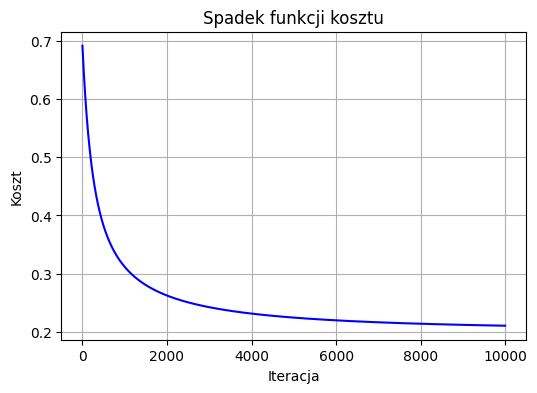

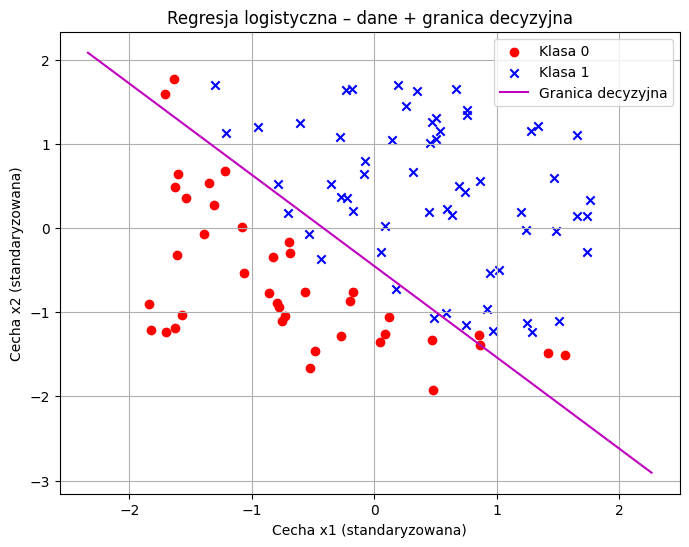

In [ ]:


def h_fun(X, theta):
    z = theta.T @ X   
    return 1.0 / (1.0 + np.exp(-z))

def calculate_cost(X, y, theta):

    h = h_fun(X, theta)
    m = X.shape[1]
    cost = -1/m * (y*np.log(h) + (1-y)*np.log(1-h)).sum()
    return cost

def gradient_descent(X, y, alpha=0.01, max_iter=10000, eps=1e-10):
    
    theta = np.zeros((X.shape[0], 1))  
    m = X.shape[1]
    prev_cost = float('inf')
    cost_history = []

    for i in range(max_iter):
        h = h_fun(X, theta)          
        gradient = (X @ (h - y).T) / m  
        theta -= alpha * gradient

        current_cost = calculate_cost(X, y, theta)
        cost_history.append(current_cost)

        
        if abs(prev_cost - current_cost) < eps:
            break
        prev_cost = current_cost

    return theta, cost_history


with open("admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])

data = np.array(examples)

y = data[:, 2:3].T  
x = data[:, :2].T  


mean_x1 = np.mean(x[0, :])
std_x1  = np.std(x[0, :])
mean_x2 = np.mean(x[1, :])
std_x2  = np.std(x[1, :])
if std_x1 < 1e-12: std_x1 = 1.0
if std_x2 < 1e-12: std_x2 = 1.0

x[0, :] = (x[0, :] - mean_x1) / std_x1
x[1, :] = (x[1, :] - mean_x2) / std_x2


X = np.concatenate([np.ones((1, x.shape[1])), x], axis=0)

print(f"{X.shape=}")
print(f"{y.shape=}")


alpha = 0.01       
max_iter = 10000   
theta, cost_history = gradient_descent(X, y, alpha=alpha, max_iter=max_iter)

print("Wytrenowane parametry theta:")
print(theta) 

plt.figure(figsize=(6, 4))
plt.plot(cost_history, 'b-')
plt.title("Spadek funkcji kosztu")
plt.xlabel("Iteracja")
plt.ylabel("Koszt")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(
    X[1, y.flatten() == 0],  
    X[2, y.flatten() == 0],  
    color='red', marker='o', label='Klasa 0'
)
plt.scatter(
    X[1, y.flatten() == 1],  
    X[2, y.flatten() == 1],  
    color='blue', marker='x', label='Klasa 1'
)


x1_db = np.linspace(X[1, :].min()-0.5, X[1, :].max()+0.5, 200)
x2_db = -(theta[0,0] + theta[1,0]*x1_db) / theta[2,0]

plt.plot(x1_db, x2_db, '-m', label='Granica decyzyjna')

plt.xlabel("Cecha x1 (standaryzowana)")
plt.ylabel("Cecha x2 (standaryzowana)")
plt.legend()
plt.grid(True)
plt.title("Regresja logistyczna – dane + granica decyzyjna")
plt.show()


Wytrenowane parametry theta:
[[-2.83823162]
 [ 2.17358007]
 [ 2.97818272]
 [ 2.07226602]]


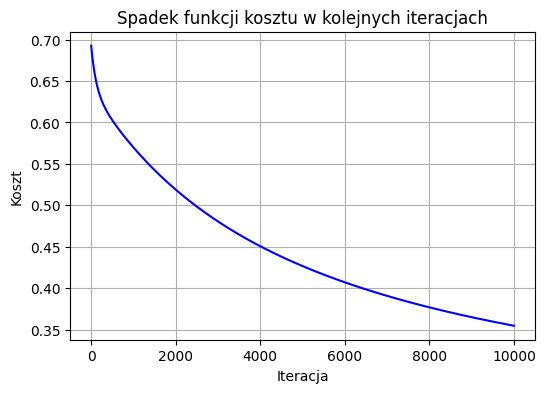

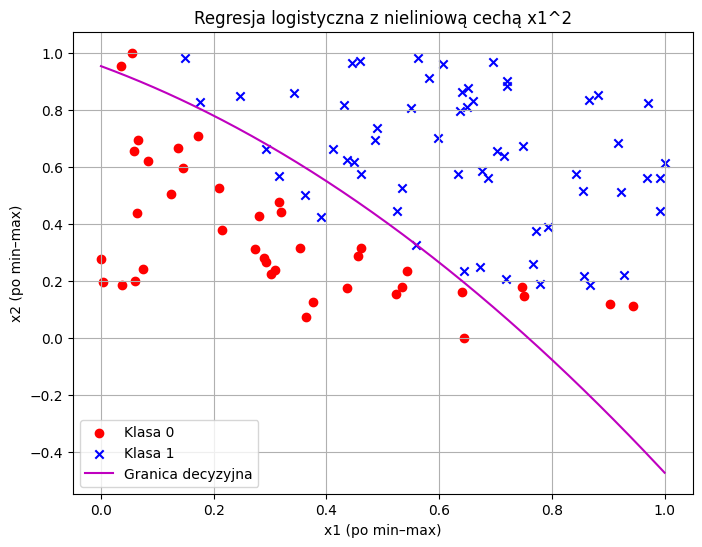

In [ ]:
import csv
import numpy as np
from matplotlib import pyplot as plt

def h_fun(X, theta):
    z = theta.T @ X  
    return 1.0 / (1.0 + np.exp(-z))

def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    m = X.shape[1]
    cost = -1/m * (y*np.log(h) + (1-y)*np.log(1-h)).sum()
    return cost

def gradient_descent(X, y, alpha=0.5, max_iter=10000, eps=1e-16):
    theta = np.zeros((X.shape[0], 1))  
    m = X.shape[1]
    prev_cost = float('inf')
    cost_history = []

    for i in range(max_iter):
        h = h_fun(X, theta)           
        gradient = (X @ (h - y).T) / m  
        theta -= alpha * gradient

        current_cost = calculate_cost(X, y, theta)
        cost_history.append(current_cost)

        if abs(prev_cost - current_cost) < eps:
            break
        prev_cost = current_cost

    return theta, cost_history

with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
data = np.array(examples)

y = data[:, 2:3].T      
x1 = data[:, :1].T      
x2 = data[:, 1:2].T     


X = np.concatenate([np.ones((1, x1.shape[1])), x1, x2, x1**2], axis=0)


for i in range(1, X.shape[0]):
    mu = np.mean(X[i, :])
    sigma = np.std(X[i, :])
    X[i, :] = (X[i, :] - mu) / sigma


X_max = X.max(axis=1)  
X_min = X.min(axis=1)  


X_max = X_max.reshape(X_max.shape[0], 1) 
X_min = X_min.reshape(X_min.shape[0], 1)  


X_min[0] = 0

X = (X - X_min) / (X_max - X_min)


alpha = 0.01      
max_iter = 10000  

theta, cost_history = gradient_descent(X, y, alpha=alpha, max_iter=max_iter)

print("Wytrenowane parametry theta:")
print(theta)  

plt.figure(figsize=(6,4))
plt.plot(cost_history, 'b-', linewidth=1.5)
plt.title("Spadek funkcji kosztu w kolejnych iteracjach")
plt.xlabel("Iteracja")
plt.ylabel("Koszt")
plt.grid(True)
plt.show()


plt.figure(figsize=(8,6))



x1_scaled = X[1, :]  
x2_scaled = X[2, :] 

plt.scatter(
    x1_scaled[y.flatten() == 0],
    x2_scaled[y.flatten() == 0],
    color='red', marker='o', label='Klasa 0'
)
plt.scatter(
    x1_scaled[y.flatten() == 1],
    x2_scaled[y.flatten() == 1],
    color='blue', marker='x', label='Klasa 1'
)

x1_db = np.linspace(x1_scaled.min(), x1_scaled.max(), 300)

decision_threshold = 0.5  # 0.3 lub 0.7
decision_constant = np.log(decision_threshold / (1 - decision_threshold))
x2_db = -(theta[0,0] + theta[1,0]*x1_db + theta[3,0]*(x1_db**2) - decision_constant) / theta[2,0]




plt.plot(x1_db, x2_db, '-m', label='Granica decyzyjna')

plt.xlabel("x1 (po min–max)")
plt.ylabel("x2 (po min–max)")
plt.title("Regresja logistyczna z nieliniową cechą x1^2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


def h_fun(X, theta):
    z = theta.T @ X
    return 1.0 / (1.0 + np.exp(-z))

def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    m = X.shape[1]
    cost = -1/m * ( y*np.log(h+1e-10) + (1-y)*np.log(1-h+1e-10) ).sum()
    return cost


digits = datasets.load_digits()
x = digits['data']       
y = digits['target']     


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1234)


x_scale = np.max(x_train)
x_train = x_train / x_scale
x_test = x_test / x_scale

m = x_train.shape[0]         
n = x_train.shape[1]         
no_of_cls = 10               

theta_list = []     
eps = 1e-5          
alpha = 1e-1        

for cls_id in range(no_of_cls):
    print(f'Optymalizacja dla klasy {cls_id}')
    
    y_cls = (y_train == cls_id).astype(np.int8)  
    y_cls = y_cls.reshape(1, m)                  
    

    X_cls = np.concatenate([np.ones((1, m)), x_train.T], axis=0)
    
    theta_cls = np.zeros((n+1, 1))
    
    prev_cost = calculate_cost(X_cls, y_cls, theta_cls)
    
    while True:
        h = h_fun(X_cls, theta_cls)  

        gradient = (X_cls @ (h - y_cls).T) / m  
        theta_cls = theta_cls - alpha * gradient
        current_cost = calculate_cost(X_cls, y_cls, theta_cls)
        if math.fabs(prev_cost - current_cost) < eps:
            break
        prev_cost = current_cost
    
    print(f'Koszt dla klasy {cls_id}: {current_cost:.4f}')
    theta_list.append(theta_cls)


m_test = x_test.shape[0]
predictions = np.zeros(m_test, dtype=np.int8)

for i in range(m_test):
    probabs = np.zeros(no_of_cls)
    # Dla przykładu i: budujemy wektor X_example (z bias) – kształt (n+1, 1)
    x_example = x_test[i]  # (n,)
    X_example = np.concatenate(([1], x_example))[:, np.newaxis]  # (n+1, 1)
    
    for cls_id, theta_cls in enumerate(theta_list):
        probabs[cls_id] = h_fun(X_example, theta_cls)
    
    # Predykcja: klasa z maksymalnym prawdopodobieństwem
    predictions[i] = np.argmax(probabs)

# -----------------------------
# 4. Ewaluacja wyników – macierz konfuzji i raport
# -----------------------------
print("\nMacierz konfuzji:")
conf_mat = confusion_matrix(y_test, predictions)
print(conf_mat)

print("\nRaport klasyfikacji:")
report = classification_report(y_test, predictions, digits=3)
print(report)

# Dodatkowo możemy policzyć czułość (recall) i precyzję (precision) dla każdej klasy ręcznie:
# Czułość (sensitivity) = TP / (TP + FN)
# Precyzja (PP) = TP / (TP + FP)
TP = np.diag(conf_mat)
FN = conf_mat.sum(axis=1) - TP
FP = conf_mat.sum(axis=0) - TP

sensitivity = TP / (TP + FN + 1e-10)  # zapobiegamy dzieleniu przez zero
precision = TP / (TP + FP + 1e-10)

print("\nKlasa |   Czułość (recall) | Precyzja (precision)")
for cls_id in range(no_of_cls):
    print(f"  {cls_id}   |     {sensitivity[cls_id]:.2f}         |     {precision[cls_id]:.2f}")


Optymalizacja dla klasy 0
Koszt dla klasy 0: 0.0247
Optymalizacja dla klasy 1
Koszt dla klasy 1: 0.0814
Optymalizacja dla klasy 2
Koszt dla klasy 2: 0.0364
Optymalizacja dla klasy 3
Koszt dla klasy 3: 0.0649
Optymalizacja dla klasy 4
Koszt dla klasy 4: 0.0337
Optymalizacja dla klasy 5
Koszt dla klasy 5: 0.0450
Optymalizacja dla klasy 6
Koszt dla klasy 6: 0.0358
Optymalizacja dla klasy 7
Koszt dla klasy 7: 0.0395
Optymalizacja dla klasy 8
Koszt dla klasy 8: 0.1101
Optymalizacja dla klasy 9
Koszt dla klasy 9: 0.0794

Macierz konfuzji:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  1  0  0  2]
 [ 0  1 47  0  0  0  0  1  0  0]
 [ 0  0  0 43  0  1  0  0  0  0]
 [ 1  0  0  0 48  0  0  2  1  0]
 [ 0  0  0  0  1 46  1  0  0  1]
 [ 0  1  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  3  1  0  0  0  1  0 37  1]
 [ 0  0  0  0  0  0  0  2  3 39]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0      0.974     1.000     0.987        37

In [5]:
import numpy as np
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Wczytanie danych
data = datasets.load_digits()
y = data['target']
x = data['data']

# Podział na zbiór uczący i testowy
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1234)

# Parametry
no_of_cls = 10  # Liczba klas (cyfr 0-9)
x_scale = np.max(x_train)
eps = 1e-5
alpha = 1e-1

# Funkcja kosztu dla regresji logistycznej
def calculate_cost(X, y, theta):
    m = y.shape[1]
    h = 1 / (1 + np.exp(-theta.T @ X))
    cost = (-y @ np.log(h).T - (1 - y) @ np.log(1 - h).T) / m
    return cost.item()

# Optymalizacja modeli
theta_list = []
m, n = x_train.shape

for cls_id in range(no_of_cls):
    print(f'Optymalizacja dla klasy {cls_id}')
    y_cls = (y_train == cls_id).astype(np.int8).reshape(1, -1)
    x_tmp = x_train / x_scale  # Skalowanie danych
    X_cls = np.concatenate([np.ones((1, m)), x_tmp.T])
    theta_cls = np.zeros((n + 1, 1))
    
    prev_cost = calculate_cost(X_cls, y_cls, theta_cls)
    while True:
        h = 1 / (1 + np.exp(-theta_cls.T @ X_cls))
        grad = (X_cls @ (h - y_cls).T) / m
        theta_cls -= alpha * grad
        
        current_cost = calculate_cost(X_cls, y_cls, theta_cls)
        if math.fabs(prev_cost - current_cost) < eps:
            break
        prev_cost = current_cost
    
    print(f'Koszt dla klasy {cls_id}: {current_cost:.5f}')
    theta_list.append(theta_cls)

# Ewaluacja na zbiorze testowym
y_pred = []
m_test = x_test.shape[0]

for example_id in range(m_test):
    probabs = np.zeros(no_of_cls)
    x_example = x_test[example_id] / x_scale
    X_example = np.concatenate(([1], x_example)).reshape(-1, 1)
    
    for cls_id, theta_cls in enumerate(theta_list):
        probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))
    
    pred = np.argmax(probabs)
    y_pred.append(pred)

y_pred = np.array(y_pred)

# Macierz konfuzji
conf_matrix = confusion_matrix(y_test, y_pred)
print("Macierz konfuzji:")
print(conf_matrix)

# Raport klasyfikacji
report = classification_report(y_test, y_pred, digits=2)
print("Raport klasyfikacji:")
print(report)


Optymalizacja dla klasy 0
Koszt dla klasy 0: 0.02474
Optymalizacja dla klasy 1
Koszt dla klasy 1: 0.08141
Optymalizacja dla klasy 2
Koszt dla klasy 2: 0.03636
Optymalizacja dla klasy 3
Koszt dla klasy 3: 0.06488
Optymalizacja dla klasy 4
Koszt dla klasy 4: 0.03373
Optymalizacja dla klasy 5
Koszt dla klasy 5: 0.04500
Optymalizacja dla klasy 6
Koszt dla klasy 6: 0.03576
Optymalizacja dla klasy 7
Koszt dla klasy 7: 0.03950
Optymalizacja dla klasy 8
Koszt dla klasy 8: 0.11012
Optymalizacja dla klasy 9
Koszt dla klasy 9: 0.07943
Macierz konfuzji:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  1  0  0  2]
 [ 0  1 47  0  0  0  0  1  0  0]
 [ 0  0  0 43  0  1  0  0  0  0]
 [ 1  0  0  0 48  0  0  2  1  0]
 [ 0  0  0  0  1 46  1  0  0  1]
 [ 0  1  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  3  1  0  0  0  1  0 37  1]
 [ 0  0  0  0  0  0  0  2  3 39]]
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99  